In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql

In [2]:
database = "accident_data_v1.0.0_2023.db"
connection = sql.connect(database)

In [3]:
query = '''SELECT * From accident data'''

In [4]:
df = pd.read_sql_query(query, connection)
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               461352 non-null  object 
 1   accident_year                                461352 non-null  int64  
 2   accident_reference                           461352 non-null  object 
 3   location_easting_osgr                        461236 non-null  float64
 4   location_northing_osgr                       461236 non-null  float64
 5   longitude                                    461226 non-null  float64
 6   latitude                                     461226 non-null  float64
 7   police_force                                 461352 non-null  int64  
 8   accident_severity                            461352 non-null  int64  
 9   number_of_vehicles                           461352 non-nul

In [20]:
df["accident_index"].unique()

array(['2017010001708', '2017010009342', '2017010009344', ...,
       '2020991030297', '2020991030900', '2020991032575'], dtype=object)

# 1. Are there significant hours of the day, and days of the week, on which accidents occur?



In [18]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract hour and day of the week from the 'time' column
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Group by hour and day of the week, and count the number of accidents
hourly_accidents = df.groupby('hour').size()
daily_accidents = df.groupby('day_of_week').size()

# Find the hours with the most accidents
peak_hours = hourly_accidents.idxmax(), hourly_accidents.max()

# Find the days with the most accidents
peak_days = daily_accidents.idxmax(), daily_accidents.max()

print(f"Peak hours for accidents: Hour {peak_hours[0]} with {peak_hours[1]} accidents")
print(f"Peak days for accidents: Day {peak_days[0]} with {peak_days[1]} accidents")

Peak hours for accidents: Hour 17 with 40307 accidents
Peak days for accidents: Day 4 with 75211 accidents


# 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? 
# We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6676\1518636391.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  filtered_df['hour'] = pd.to_datetime(filtered_df['time']).dt.hour
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6676\1518636391.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = pd.to_datetime(filtered_df['time']).dt.hour


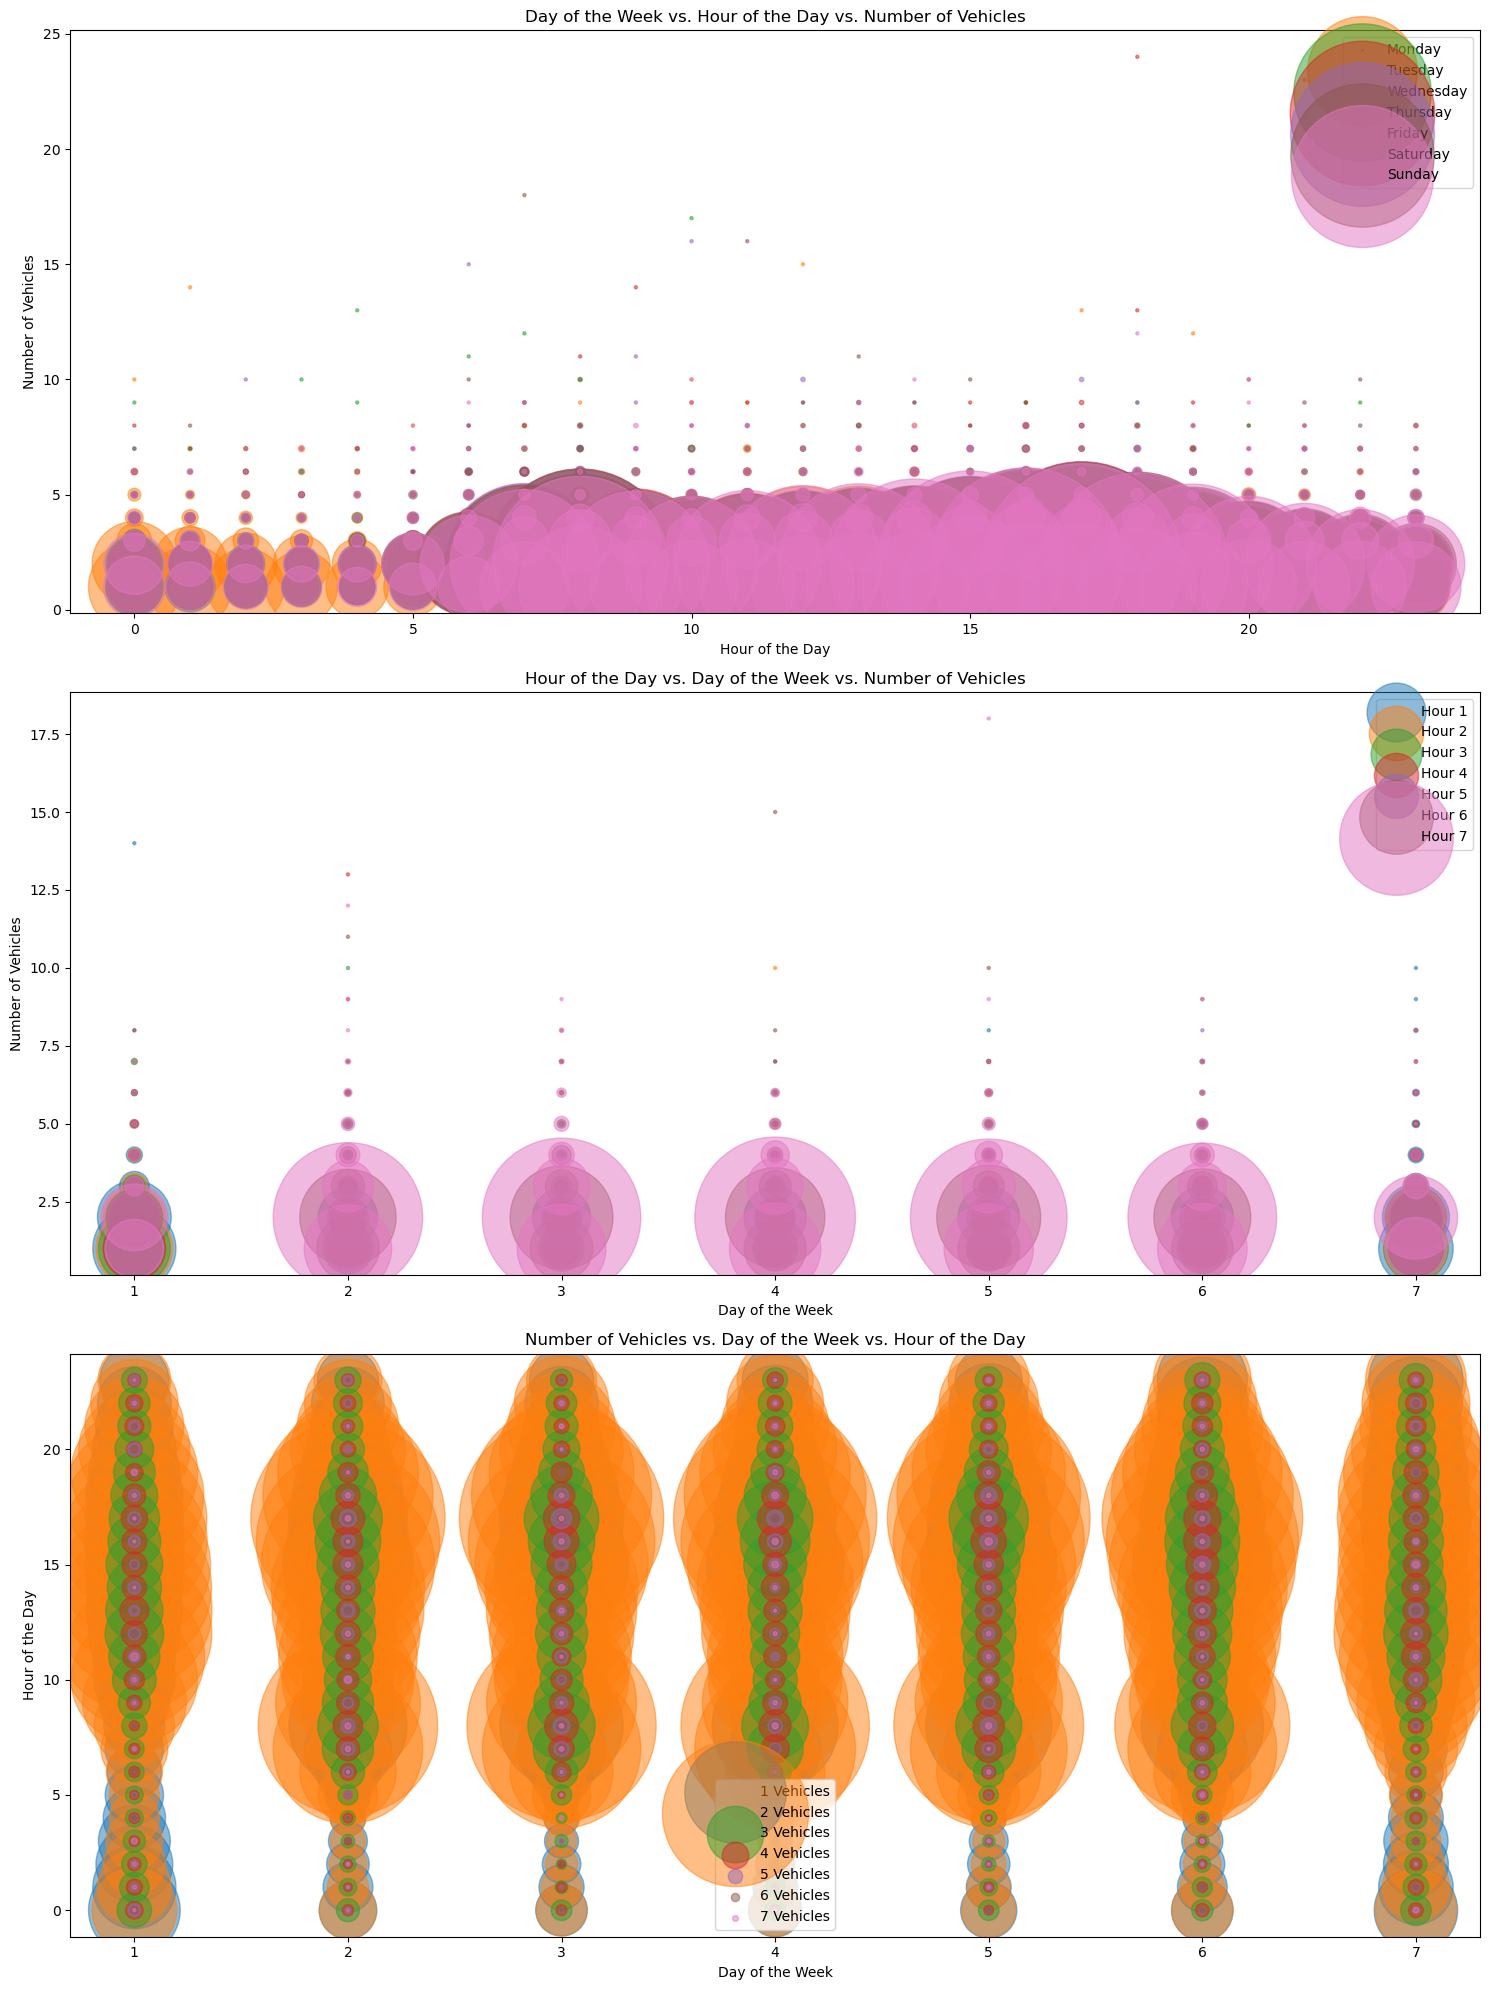

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the accident data
# Assuming 'day_of_week', 'time', 'number_of_vehicles', and 'accident_index' columns are available

# Filter the dataset to include only the required columns
filtered_df = df[['day_of_week', 'time', 'number_of_vehicles', 'accident_index']]

# Extract hour of the day from the 'time' column
filtered_df['hour'] = pd.to_datetime(filtered_df['time']).dt.hour

# Group by day of the week, hour of the day, and number of vehicles to count the number of accidents
grouped_df = filtered_df.groupby(['day_of_week', 'hour', 'number_of_vehicles']).size().reset_index(name='count')

# Plotting the relationship between day of the week, hour of the day, number of vehicles, and accident index
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Day of the week vs. number of vehicles vs. accident index
for i, day in enumerate(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']):
    day_df = grouped_df[grouped_df['day_of_week'] == i]
    axs[0].scatter(day_df['hour'], day_df['number_of_vehicles'], s=day_df['count']*5, alpha=0.5, label=day)
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Number of Vehicles')
axs[0].set_title('Day of the Week vs. Hour of the Day vs. Number of Vehicles')
axs[0].legend()

# Hour of the day vs. number of vehicles vs. accident index
for i in range(1, 8):
    hour_df = grouped_df[grouped_df['hour'] == i]
    axs[1].scatter(hour_df['day_of_week'], hour_df['number_of_vehicles'], s=hour_df['count']*5, alpha=0.5, label=f'Hour {i}')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Number of Vehicles')
axs[1].set_title('Hour of the Day vs. Day of the Week vs. Number of Vehicles')
axs[1].legend()

# Number of vehicles vs. accident index
for i in range(1, 8):
    vehicles_df = grouped_df[grouped_df['number_of_vehicles'] == i]
    axs[2].scatter(vehicles_df['day_of_week'], vehicles_df['hour'], s=vehicles_df['count']*5, alpha=0.5, label=f'{i} Vehicles')
axs[2].set_xlabel('Day of the Week')
axs[2].set_ylabel('Hour of the Day')
axs[2].set_title('Number of Vehicles vs. Day of the Week vs. Hour of the Day')
axs[2].legend()

plt.tight_layout()
plt.show()


# 3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6676\3903004224.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pedestrian_accidents['time'] = pd.to_datetime(pedestrian_accidents['time'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6676\3903004224.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrian_accidents['time'] = pd.to_datetime(pedestrian_accidents['time'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6676\3903004224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

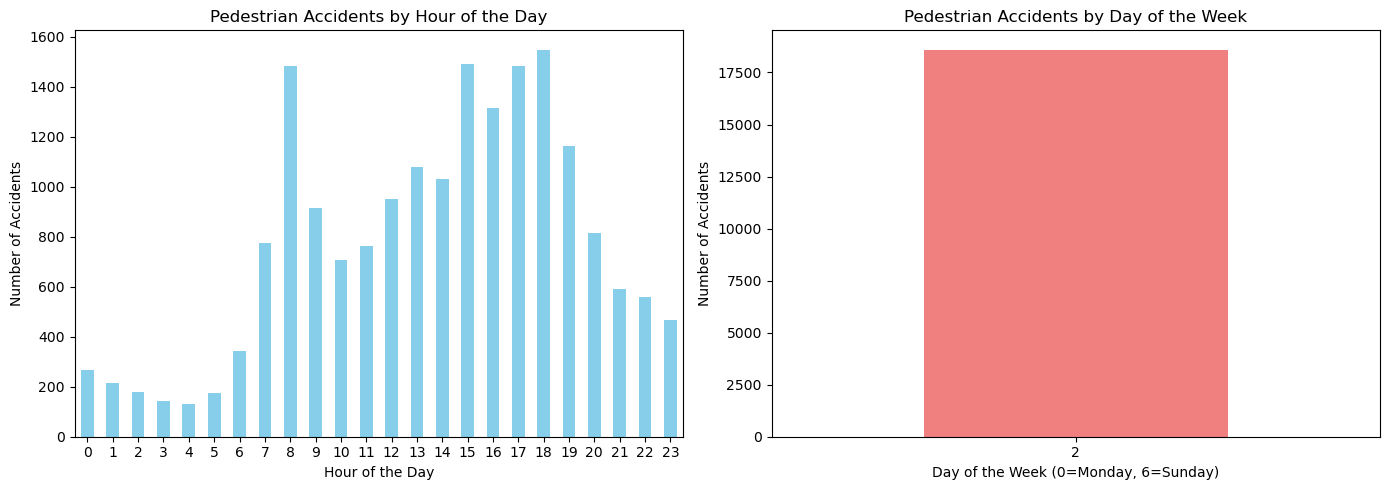

In [22]:
import matplotlib.pyplot as plt


pedestrian_accidents = df[df['pedestrian_crossing_human_control'] > 0]

# Convert 'time' column to datetime format
pedestrian_accidents['time'] = pd.to_datetime(pedestrian_accidents['time'])

# Extract hour of the day and day of the week
pedestrian_accidents['hour'] = pedestrian_accidents['time'].dt.hour
pedestrian_accidents['day_of_week'] = pedestrian_accidents['time'].dt.dayofweek

# Group by hour and day of the week, count accidents
hourly_accidents = pedestrian_accidents.groupby('hour').size()
daily_accidents = pedestrian_accidents.groupby('day_of_week').size()

# Plotting
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
hourly_accidents.plot(kind='bar', color='skyblue')
plt.title('Pedestrian Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
daily_accidents.plot(kind='bar', color='lightcoral')
plt.title('Pedestrian Accidents by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


# 4. Using the apriori algorithm, explore the impact of selected variables on accident severity.

In [41]:
#pip install mlxtend


In [45]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


# Selecting relevant columns
selected_cols = ['weather_conditions', 'road_surface_conditions', 'light_conditions', 'accident_severity']
selected_df = df[selected_cols]

# Convert accident_severity to categorical for Apriori algorithm
selected_df['accident_severity'] = selected_df['accident_severity'].astype('category')

# Convert selected_df to a transaction format
transactions = selected_df[selected_cols[:-1]].applymap(lambda x: True if x > 0 else False)

# Apply Apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print(rules)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19544\3226194959.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['accident_severity'] = selected_df['accident_severity'].astype('category')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19544\3226194959.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = selected_df[selected_cols[:-1]].applymap(lambda x: True if x > 0 else False)


                                      antecedents  \
0                       (road_surface_conditions)   
1                            (weather_conditions)   
2                            (weather_conditions)   
3                              (light_conditions)   
4                       (road_surface_conditions)   
5                              (light_conditions)   
6   (road_surface_conditions, weather_conditions)   
7     (road_surface_conditions, light_conditions)   
8          (weather_conditions, light_conditions)   
9                       (road_surface_conditions)   
10                           (weather_conditions)   
11                             (light_conditions)   

                                      consequents  antecedent support  \
0                            (weather_conditions)            0.997783   
1                       (road_surface_conditions)            0.999954   
2                              (light_conditions)            0.999954   
3                 

# 5. Identify accidents in our region:Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?


In [47]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the accident data
# Assuming 'lsoa_of_accident_location' is the column containing the LSOA of the accident location

# Filter the dataset to include only accidents in the specified region
region = ['Kingston upon Hull', 'Humberside', 'East Riding of Yorkshire']
region_accidents = df[df['lsoa_of_accident_location'].str.contains('|'.join(region), case=False, na=False)]

if not region_accidents.empty:
    # Extract latitude and longitude for clustering
    coordinates = region_accidents[['latitude', 'longitude']]

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=5, random_state=0)
    region_accidents['cluster'] = kmeans.fit_predict(coordinates)

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(region_accidents['longitude'], region_accidents['latitude'], c=region_accidents['cluster'], cmap='viridis')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Clustering of Accidents in the Region')
    plt.colorbar(label='Cluster')
    plt.show()
else:
    print("No accidents found in the specified region.")


No accidents found in the specified region.


# 6. Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?

In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Selecting relevant columns
selected_cols = ['weather_conditions', 'road_surface_conditions', 'light_conditions', 'accident_severity']
selected_df = df[selected_cols]

# Convert accident_severity to categorical for outlier detection
selected_df['accident_severity'] = selected_df['accident_severity'].astype('category')

# Fit Isolation Forest to detect outliers
clf = IsolationForest(random_state=0)
outliers = clf.fit_predict(selected_df)

# Identify outliers
outlier_indices = selected_df[outliers == -1].index

# Decide whether to keep outliers based on the analysis of your dataset
# For example, you may want to keep outliers if they represent valid but rare events
# or remove them if they are errors or anomalies
print("Number of outliers:", len(outlier_indices))
print("Outlier indices:", outlier_indices)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8072\903528937.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['accident_severity'] = selected_df['accident_severity'].astype('category')


Number of outliers: 107476
Outlier indices: Index([     0,      4,      8,      9,     12,     13,     14,     15,     17,
           32,
       ...
       461325, 461329, 461330, 461331, 461332, 461334, 461335, 461337, 461338,
       461342],
      dtype='int64', length=107476)


# 7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents,with the aim of informing and improving road safety measures?

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting relevant columns
selected_cols = ['weather_conditions', 'road_surface_conditions', 'light_conditions', 'accident_severity']
selected_df = df[selected_cols]

# Convert accident_severity to binary for classification (1 for fatal, 0 for non-fatal)
selected_df['accident_severity'] = selected_df['accident_severity'].apply(lambda x: 1 if x == 1 else 0)

# Splitting the data into training and testing sets
X = selected_df.drop('accident_severity', axis=1)
y = selected_df['accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Random Forest classifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8072\2873692832.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['accident_severity'] = selected_df['accident_severity'].apply(lambda x: 1 if x == 1 else 0)


Accuracy: 0.9861061438588505

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     90990
           1       0.00      0.00      0.00      1281

    accuracy                           0.99     92271
   macro avg       0.49      0.50      0.50     92271
weighted avg       0.97      0.99      0.98     92271

